In [1]:
# Importing Necessary Libraries
import google
import numpy
import pandas
import os
import tensorflow
import sklearn
import tqdm
import matplotlib

In [2]:
# Kaggle API Authentication
!pip install -q kaggle
google.colab.files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
# Downloading and Unzipping The Dataset
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip -q heartbeat.zip

 96% 95.0M/98.8M [00:00<00:00, 97.5MB/s]
100% 98.8M/98.8M [00:00<00:00, 127MB/s] 


In [4]:
# Dividing The Dataset Into Training and Testing Subsets
training_dataset = pandas.read_csv("/content/mitbih_train.csv", header = None)
testing_dataset = pandas.read_csv("/content/mitbih_test.csv", header = None)

In [5]:
# Examining The Training Dataset
training_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Examining The Testing Dataset
testing_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Examining The Training Dataset Class Distribution
print("Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Training Dataset Class Distribution:

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


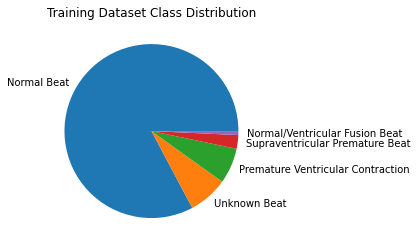

In [8]:
# Visualizing The Training Dataset Class Distribution
matplotlib.pyplot.figure() 
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["Normal Beat", "Unknown Beat", "Premature Ventricular Contraction", "Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat"])
matplotlib.pyplot.title("Training Dataset Class Distribution")
matplotlib.pyplot.show()  

In [9]:
# Resampling The Training Dataset
df_1 = training_dataset[training_dataset[187] == 1]
df_2 = training_dataset[training_dataset[187] == 2]
df_3 = training_dataset[training_dataset[187] == 3]
df_4 = training_dataset[training_dataset[187] == 4]
df_0 = (training_dataset[training_dataset[187] == 0]).sample(n = 20000, random_state = 42)

df_1_upsample = sklearn.utils.resample(df_1, replace = True, n_samples = 20000, random_state = 123)
df_2_upsample = sklearn.utils.resample(df_2, replace = True, n_samples = 20000, random_state = 124)
df_3_upsample = sklearn.utils.resample(df_3, replace = True, n_samples = 20000, random_state = 125)
df_4_upsample = sklearn.utils.resample(df_4, replace = True, n_samples = 20000, random_state = 126)

training_dataset = pandas.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [10]:
# Examining The Updated Training Dataset Class Distribution
print("Updated Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Updated Training Dataset Class Distribution:

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


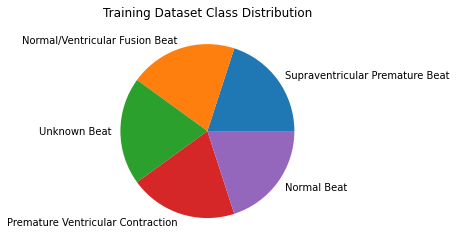

In [11]:
# Visualizing The Updated Training Dataset Class Distribution
matplotlib.pyplot.figure() 
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat", "Unknown Beat", "Premature Ventricular Contraction", "Normal Beat"])
matplotlib.pyplot.title("Training Dataset Class Distribution")
matplotlib.pyplot.show()  

In [12]:
# Splitting The Training and Testing Datasets Into Input and Output Arrays
X_train = numpy.array(training_dataset.iloc[:, :187])
X_test = numpy.array(testing_dataset.iloc[:, :187])

y_train = numpy.array(tensorflow.keras.utils.to_categorical(training_dataset[187]))
y_test = numpy.array(tensorflow.keras.utils.to_categorical(testing_dataset[187]))

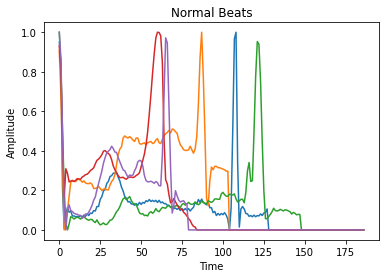

In [13]:
# Visualizing Normal Beats
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(X_train[1000])
matplotlib.pyplot.plot(X_train[2000])
matplotlib.pyplot.plot(X_train[5000])
matplotlib.pyplot.plot(X_train[10000])
matplotlib.pyplot.plot(X_train[15000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal Beats")
matplotlib.pyplot.show()

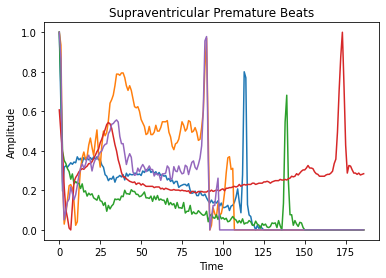

In [14]:
# Visualizing Supraventricular Premature Beats
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(X_train[20000])
matplotlib.pyplot.plot(X_train[22000])
matplotlib.pyplot.plot(X_train[25000])
matplotlib.pyplot.plot(X_train[30000])
matplotlib.pyplot.plot(X_train[35000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Supraventricular Premature Beats")
matplotlib.pyplot.show()

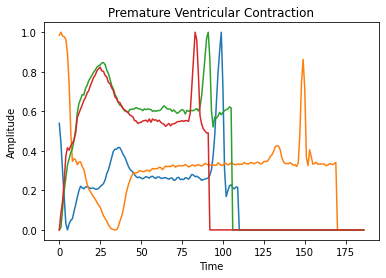

In [15]:
# Visualizing Premature Ventricular Contraction
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(X_train[40000])
matplotlib.pyplot.plot(X_train[45000])
matplotlib.pyplot.plot(X_train[50000])
matplotlib.pyplot.plot(X_train[55000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Premature Ventricular Contraction")
matplotlib.pyplot.show()

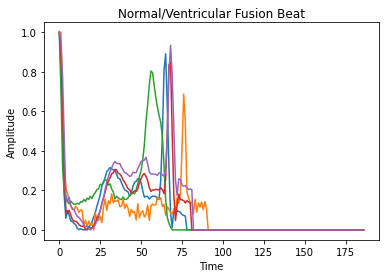

In [16]:
# Visualizing Normal/Ventricular Fusion Beat
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(X_train[60000])
matplotlib.pyplot.plot(X_train[62000])
matplotlib.pyplot.plot(X_train[65000])
matplotlib.pyplot.plot(X_train[70000])
matplotlib.pyplot.plot(X_train[75000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal/Ventricular Fusion Beat")
matplotlib.pyplot.show()

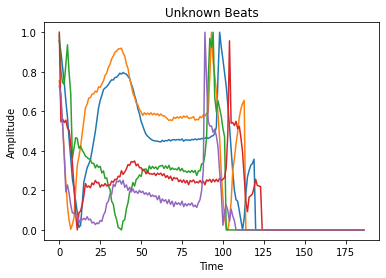

In [17]:
# Visualizing Unknown Beats
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(X_train[80000])
matplotlib.pyplot.plot(X_train[82000])
matplotlib.pyplot.plot(X_train[85000])
matplotlib.pyplot.plot(X_train[90000])
matplotlib.pyplot.plot(X_train[95000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Unknown Beats")
matplotlib.pyplot.show()

In [18]:
# Adding Noise To The Training Data To Prevent Overfitting
def add_noise(signal):
  noise = numpy.random.normal(0, 0.1, 187)
  return (signal + noise)

Augmented_X_train = add_noise(X_train)

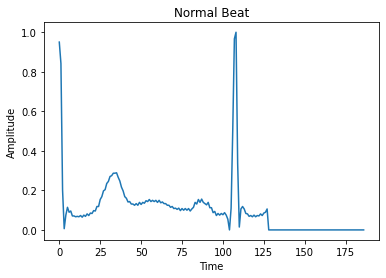

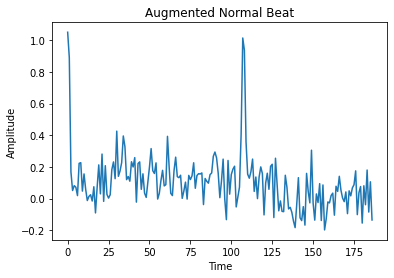

In [19]:
# Visualizing Augmented Normal Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[1000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(Augmented_X_train[1000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Normal Beat")
matplotlib.pyplot.show()

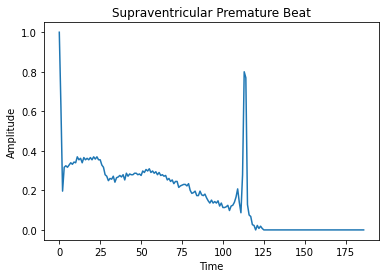

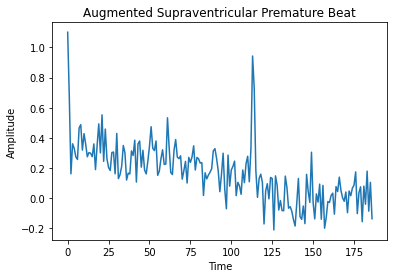

In [20]:
# Visualizing Supraventricular Premature Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[20000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Supraventricular Premature Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(Augmented_X_train[20000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Supraventricular Premature Beat")
matplotlib.pyplot.show()

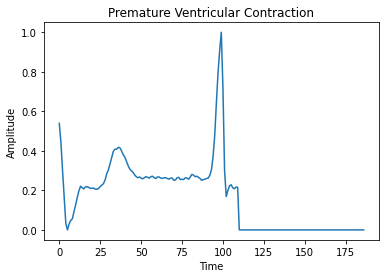

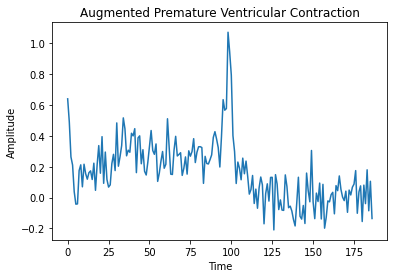

In [21]:
# Visualizing Augmented Premature Ventricular Contraction
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[40000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Premature Ventricular Contraction")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(Augmented_X_train[40000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Premature Ventricular Contraction")
matplotlib.pyplot.show()

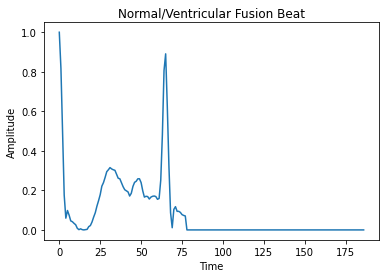

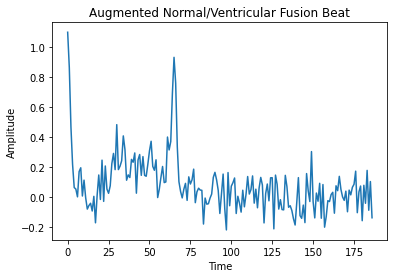

In [22]:
# Visualizing Augmented Normal Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[60000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal/Ventricular Fusion Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(Augmented_X_train[60000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Normal/Ventricular Fusion Beat")
matplotlib.pyplot.show()

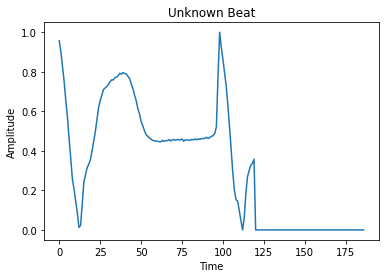

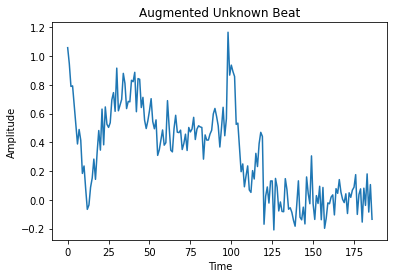

In [23]:
# Visualizing Augmented Normal Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[80000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Unknown Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(Augmented_X_train[80000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Unknown Beat")
matplotlib.pyplot.show()

In [24]:
# Building The Model
input = tensorflow.keras.layers.Input(shape = (187, 1))
C = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1)(input)

C11 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = tensorflow.keras.layers.Activation("relu")(C11)
C12 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = tensorflow.keras.layers.Add()([C12, C])
A12 = tensorflow.keras.layers.Activation("relu")(S11)
M11 = tensorflow.keras.layers.MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = tensorflow.keras.layers.Activation("relu")(C21)
C22 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = tensorflow.keras.layers.Add()([C22, M11])
A22 = tensorflow.keras.layers.Activation("relu")(S11)
M21 = tensorflow.keras.layers.MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = tensorflow.keras.layers.Activation("relu")(C31)
C32 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = tensorflow.keras.layers.Add()([C32, M21])
A32 = tensorflow.keras.layers.Activation("relu")(S31)
M31 = tensorflow.keras.layers.MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = tensorflow.keras.layers.Activation("relu")(C41)
C42 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = tensorflow.keras.layers.Add()([C42, M31])
A42 = tensorflow.keras.layers.Activation("relu")(S41)
M41 = tensorflow.keras.layers.MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = tensorflow.keras.layers.Activation("relu")(C51)
C52 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = tensorflow.keras.layers.Add()([C52, M41])
A52 = tensorflow.keras.layers.Activation("relu")(S51)
M51 = tensorflow.keras.layers.MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = tensorflow.keras.layers.Flatten()(M51)

D1 = tensorflow.keras.layers.Dense(32)(F1)
A6 = tensorflow.keras.layers.Activation("relu")(D1)
D2 = tensorflow.keras.layers.Dense(32)(A6)
D3 = tensorflow.keras.layers.Dense(5)(D2)
output = tensorflow.keras.layers.Softmax()(D3)

model = tensorflow.keras.models.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      5152        conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 183, 32)      0           conv1d_1[0][0]                   
______________________________________________________________________________________________

In [25]:
# Compiling The Model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
# Optimizing The Model
model.fit(X_train, y_train, epochs = 50, callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, restore_best_weights = True))

Epoch 1/50
3125/3125 [==============================] - 23s 5ms/step - loss: 0.4568 - accuracy: 0.8272
Epoch 2/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.1220 - accuracy: 0.9577
Epoch 3/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0859 - accuracy: 0.9711
Epoch 4/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0715 - accuracy: 0.9751
Epoch 5/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0583 - accuracy: 0.9804
Epoch 6/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0514 - accuracy: 0.9826
Epoch 7/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0490 - accuracy: 0.9840
Epoch 8/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0415 - accuracy: 0.9857
Epoch 9/50
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0363 - accuracy: 0.9878
Epoch 10/50
3125/3125 [==============================] - 15s 5ms/step - l

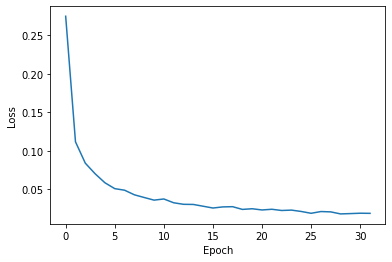

In [34]:
# Visualizing The Optimization
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(model.history.epoch, model.history.history["loss"])
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.show()

In [38]:
# Testing The Model
print("Testing Accuracy: {}%".format(int(model.evaluate(X_test, y_test)[1] * 100)))

685/685 [==============================] - 3s 4ms/step - loss: 0.1126 - accuracy: 0.9752
Testing Accuracy: 97%


In [39]:
# Saving The Model
model.save("MIT-BIH_Model.h5")